## Duomenų papildymas. Visų rušių automobilių visos registracijos

In [1]:
# Importuojame bibliotekas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome duomenis iš failo
df_visi_base = pd.read_csv('Atviri_TP_parko_duomenys.csv', usecols=['MARKE', 'PIRM_REG_DATA_LT']) 
df_visi_base

,MARKE,PIRM_REG_DATA_LT
0,VW,NaN
1,Nuasmeninta,1997-06-17
2,XTP,NaN
3,VMZ,NaN
4,MAZ,NaN
...,...,...
2274509,BMW,2024-02-23
2274510,KRONE,2024-02-23
2274511,TIKI,2024-05-17
2274512,VOLKSWAGEN. VW,2024-06-15


In [2]:
# Triname eilutes su  NaN
df_visi = df_visi_base.dropna()
df_visi

,MARKE,PIRM_REG_DATA_LT
1,Nuasmeninta,1997-06-17
19,VAZ,1995-02-22
21,AUDI,1994-12-20
29,AUDI,1995-09-19
39,VILKMERGE,1992-10-20
...,...,...
2274509,BMW,2024-02-23
2274510,KRONE,2024-02-23
2274511,TIKI,2024-05-17
2274512,VOLKSWAGEN. VW,2024-06-15


In [3]:
# Sutrumpiname datos formatą iki metai-mėnuo
df_visi.loc[:,'PIRM_REG_DATA_LT'] = df_visi.loc[:,'PIRM_REG_DATA_LT'].str[0:7]
df_visi

,MARKE,PIRM_REG_DATA_LT
1,Nuasmeninta,1997-06
19,VAZ,1995-02
21,AUDI,1994-12
29,AUDI,1995-09
39,VILKMERGE,1992-10
...,...,...
2274509,BMW,2024-02
2274510,KRONE,2024-02
2274511,TIKI,2024-05
2274512,VOLKSWAGEN. VW,2024-06


In [4]:
# Grupuojam pagal datą
df_visi = df_visi.groupby('PIRM_REG_DATA_LT').count()['MARKE']
df_visi = pd.DataFrame(df_visi)
df_visi

,MARKE
PIRM_REG_DATA_LT,
1951-08,1
1959-03,1
1964-01,1
1964-04,1
1966-06,1
...,...
2024-03,16130
2024-04,17435
2024-05,19238


In [5]:
# Pakeięiam stulpelio pavadinimą
df_visi = df_visi.rename(columns = {'MARKE': 'KIEKIS'})
df_visi

,KIEKIS
PIRM_REG_DATA_LT,
1951-08,1
1959-03,1
1964-01,1
1964-04,1
1966-06,1
...,...
2024-03,16130
2024-04,17435
2024-05,19238


In [6]:
# Pakartotinis tikrinimas
df_visi.isnull().any()

KIEKIS    False
dtype: bool

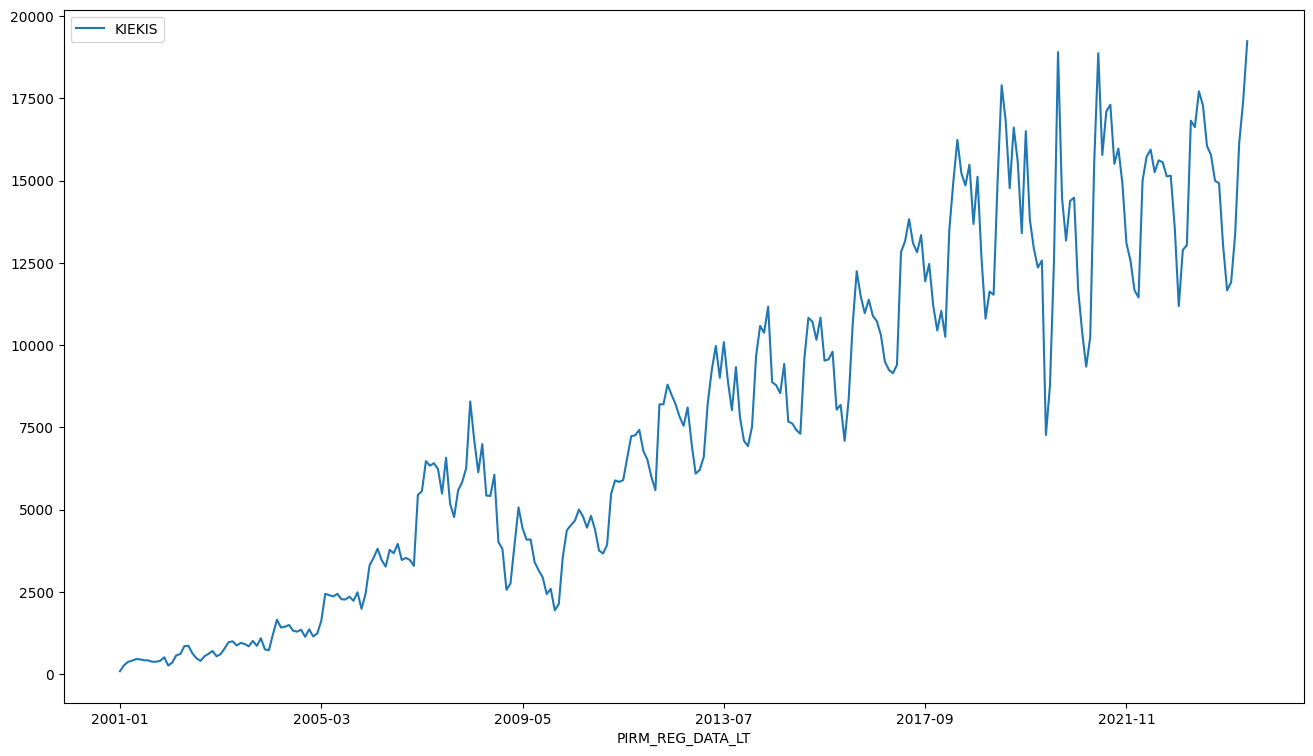

In [7]:
# Atspausdiname grafiką
df_visi.loc['2001-01': '2024-05'].plot( figsize=(16, 9))

# Atnaujiname df_visi
df_visi = df_visi.loc['2001-01': '2024-05']

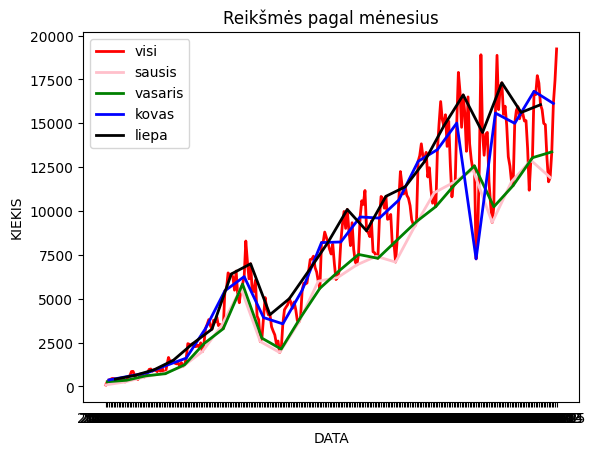

In [8]:
# Atspausdiname ir analizuojame pagal mėnesius 
plt.plot(df_visi.loc['2001-01': '2024-05'], color='red', linewidth=2, label='visi')
plt.plot(df_visi.loc['2001-01': '2024-05': 12], color='pink', linewidth=2, label='sausis')
plt.plot(df_visi.loc['2001-02': '2024-06': 12], color='green', linewidth=2, label='vasaris')
plt.plot(df_visi.loc['2001-03': '2024-07': 12], color='blue', linewidth=2, label='kovas')
plt.plot(df_visi.loc['2001-07': '2024-07': 12], color='black', linewidth=2, label='liepa')
plt.xlabel('DATA')
plt.ylabel('KIEKIS')
plt.title('Reikšmės pagal mėnesius')
plt.legend()
plt.show()

In [9]:
# Sukuriame duomenų faila su visų metų sausio mėnesiais
df_visi_sausis = df_visi['2001-01': '2024-05':12]
df_visi_sausis = df_visi_sausis.reset_index()
df_visi_sausis = df_visi_sausis.rename(columns = {'MARKE': 'KIEKIS'})
df_visi_sausis.to_csv('data_visi_sausis.csv', index=False)

print('eilučių skaičius: ',len(df_visi_sausis))
df_visi_sausis

eilučių skaičius:  24


,PIRM_REG_DATA_LT,KIEKIS
0,2001-01,87
1,2002-01,258
2,2003-01,541
3,2004-01,751
4,2005-01,1145
5,2006-01,1985
6,2007-01,3471
7,2008-01,5589
8,2009-01,2560
9,2010-01,1937


In [10]:
# Sukuriame duomenų faila su visų metų ir mėnesių duomenimis
df_visi = df_visi.reset_index()

# Stuplelio pavadinimą pakeičiu labiau informatyviu
# df_visi = df_visi.rename(columns = {'MARKE': 'KIEKIS'})

# Įrašome į failą sutvarkytus duomenis
df_visi.to_csv('data_visi.csv', index=False)

print('eilučių skaičius: ', len(df_visi))
df_visi

eilučių skaičius:  281


,PIRM_REG_DATA_LT,KIEKIS
0,2001-01,87
1,2001-02,267
2,2001-03,371
3,2001-04,406
4,2001-05,456
...,...,...
276,2024-01,11914
277,2024-02,13368
278,2024-03,16130
279,2024-04,17435
